### Importing Libraries

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\sivak\Downloads\student-scores.csv")
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [6]:
df = df.drop(columns = [ 'first_name', 'last_name', 'email'])
df.head()

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [7]:
df['total_score'] = df['math_score'] + df['history_score'] + df['physics_score'] +df['chemistry_score'] + df['biology_score'] + df['english_score'] + df['geography_score']
df['average_score'] = df['total_score'] / 7

### Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2000 non-null   int64  
 1   gender                      2000 non-null   object 
 2   part_time_job               2000 non-null   bool   
 3   absence_days                2000 non-null   int64  
 4   extracurricular_activities  2000 non-null   bool   
 5   weekly_self_study_hours     2000 non-null   int64  
 6   career_aspiration           2000 non-null   object 
 7   math_score                  2000 non-null   int64  
 8   history_score               2000 non-null   int64  
 9   physics_score               2000 non-null   int64  
 10  chemistry_score             2000 non-null   int64  
 11  biology_score               2000 non-null   int64  
 12  english_score               2000 non-null   int64  
 13  geography_score             2000 

In [10]:
df.isna().sum()

id                            0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
total_score                   0
average_score                 0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.5,1500.250000,2000.000000
absence_days,2000.0,3.665500,2.629271,0.000000,2.000000,3.0,5.000000,10.000000
weekly_self_study_hours,2000.0,17.755500,12.129604,0.000000,5.000000,18.0,28.000000,50.000000
math_score,2000.0,83.452000,13.224906,40.000000,77.000000,87.0,93.000000,100.000000
history_score,2000.0,80.332000,12.736046,50.000000,69.750000,82.0,91.000000,100.000000
physics_score,2000.0,81.336500,12.539453,50.000000,71.000000,83.0,92.000000,100.000000
chemistry_score,2000.0,79.995000,12.777895,50.000000,69.000000,81.0,91.000000,100.000000
biology_score,2000.0,79.581500,13.722190,30.000000,69.000000,81.0,91.000000,100.000000
english_score,2000.0,81.277500,12.027087,50.000000,72.000000,83.0,91.000000,99.000000
geography_score,2000.0,80.888000,11.637705,60.000000,71.000000,81.0,91.000000,100.000000


In [12]:
df["gender"].value_counts()

gender
female    1002
male       998
Name: count, dtype: int64

In [13]:
df["part_time_job"].value_counts()

part_time_job
False    1684
True      316
Name: count, dtype: int64

In [14]:
df["absence_days"].value_counts().reset_index()

,absence_days,count
0,2,344
1,1,341
2,3,336
3,4,199
4,5,196
5,6,136
6,7,130
7,0,123
8,10,88
9,9,56


In [15]:
df["career_aspiration"].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

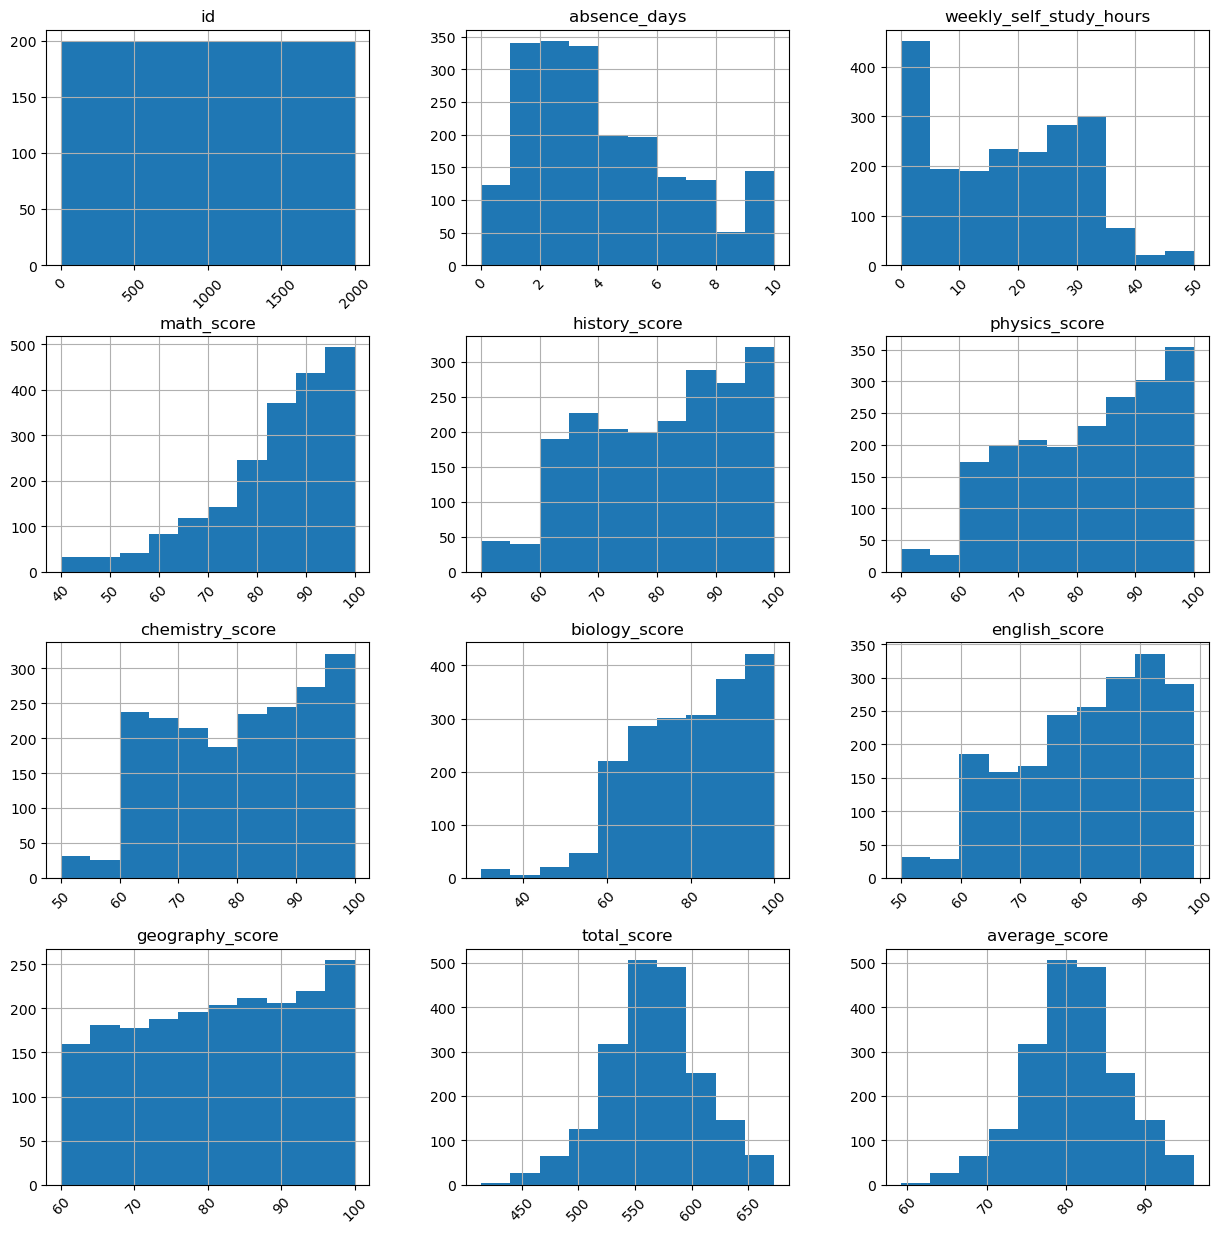

In [16]:
#Destribution of numerical features
df.hist(figsize=(15,15),xrot=45 ,bins=10)
plt.show()

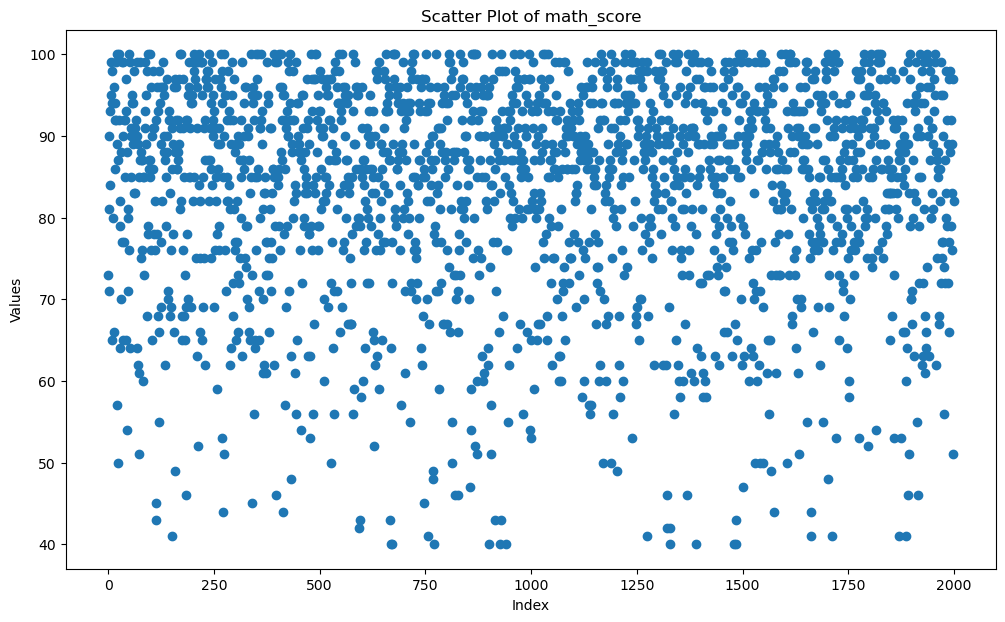

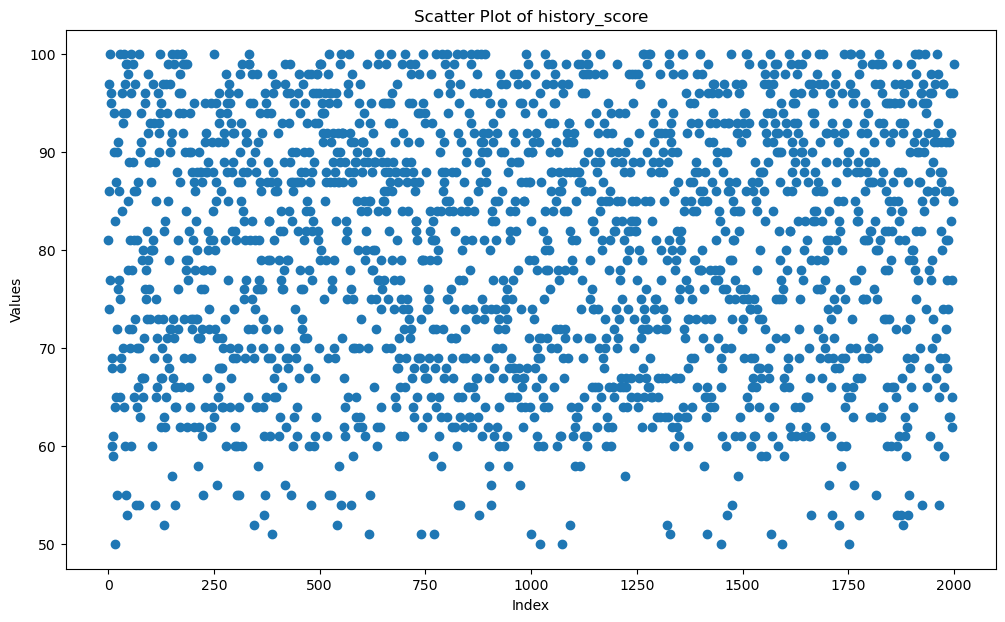

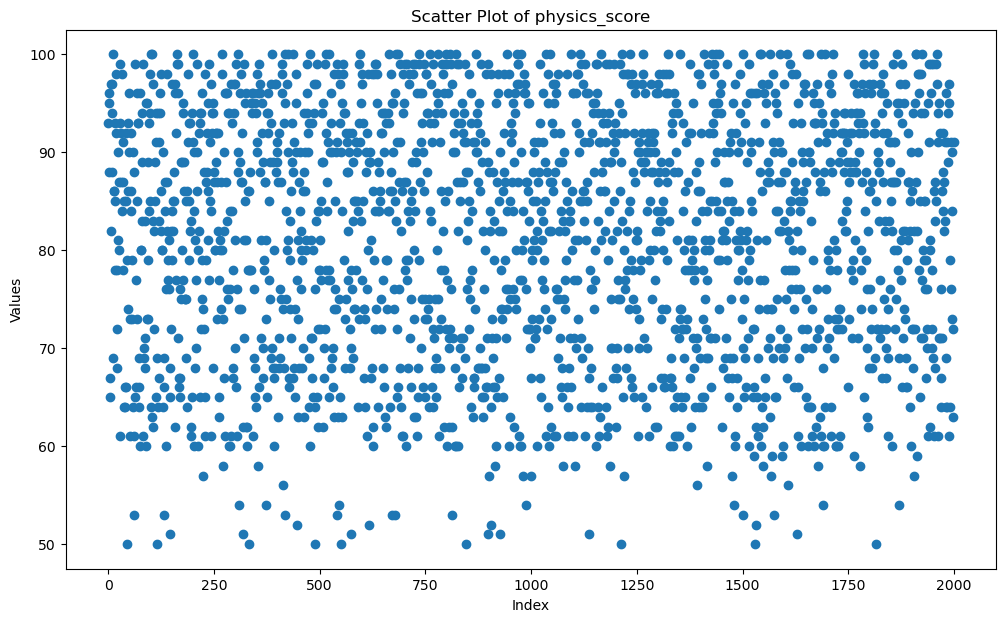

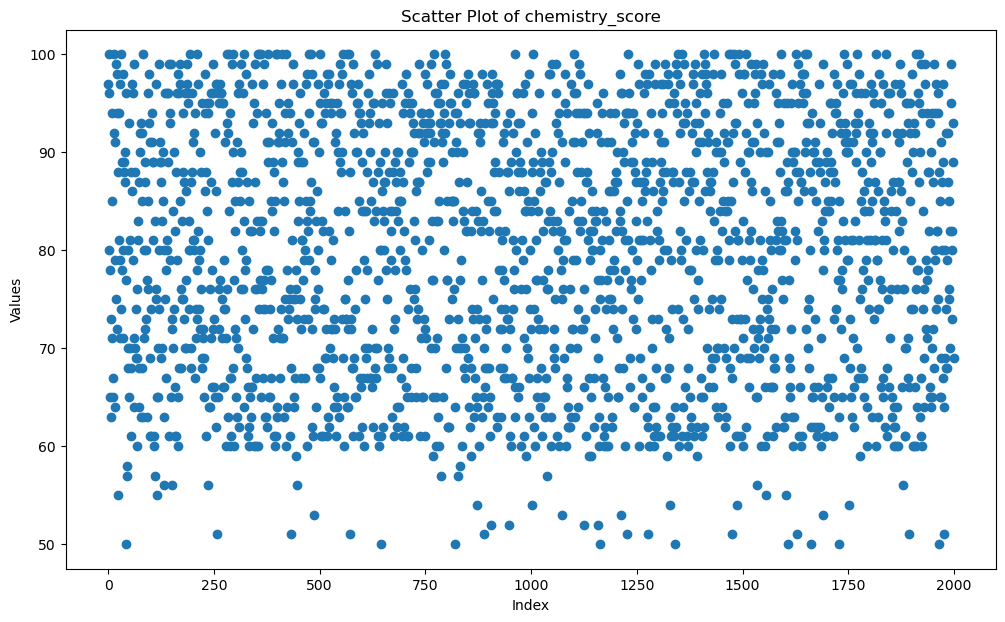

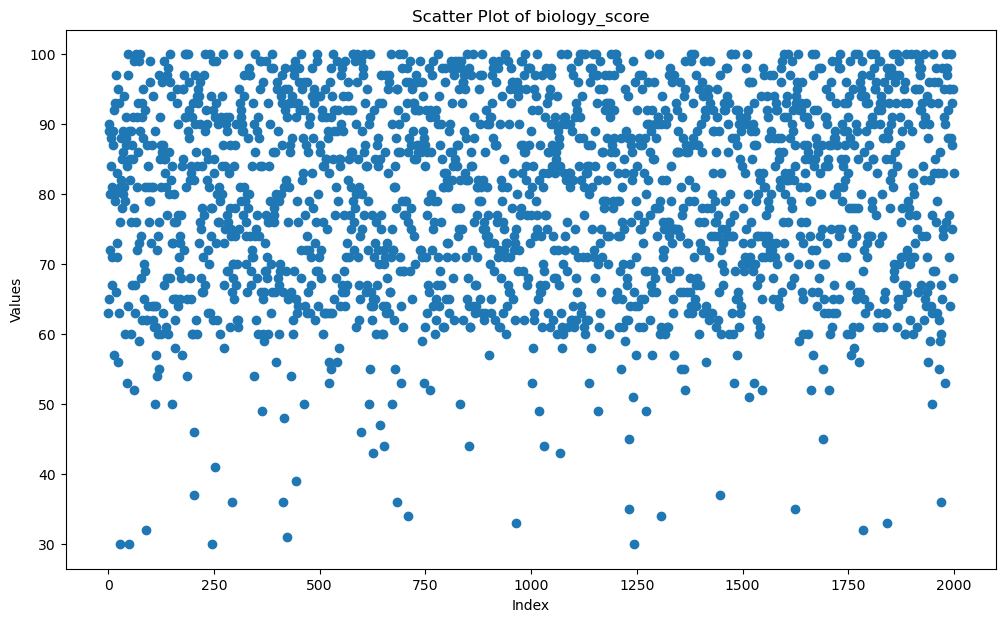

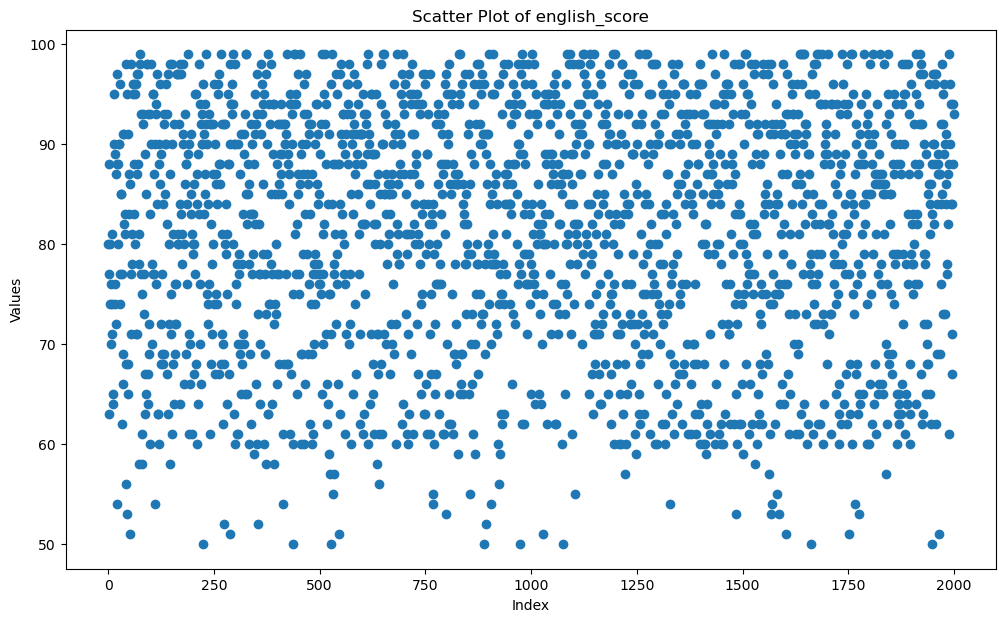

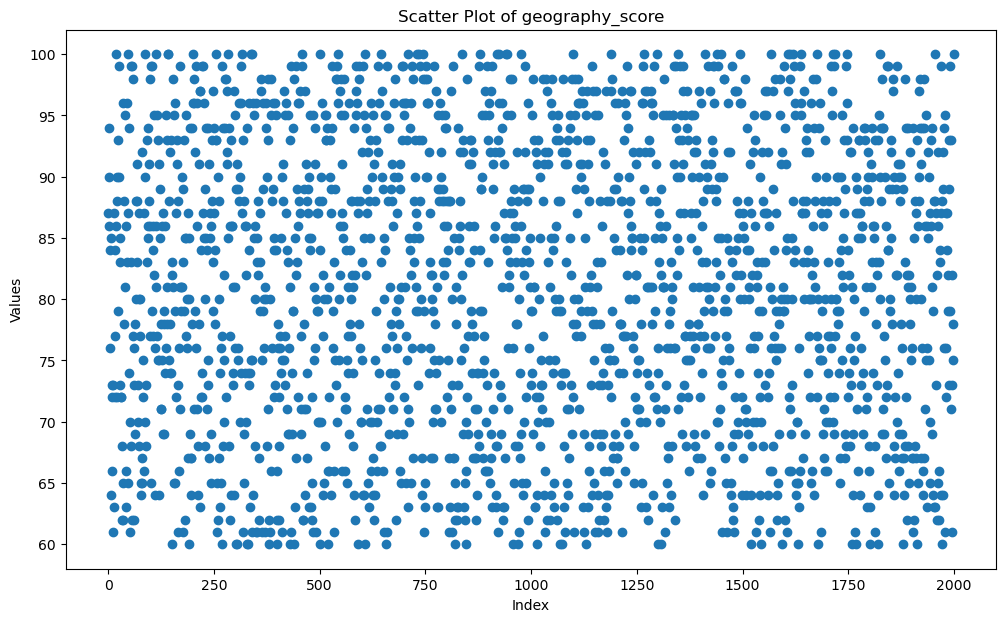

In [17]:
features = [ 'math_score', 'history_score', 'physics_score','chemistry_score', 
            'biology_score', 'english_score', 'geography_score']

for feature in features:
    plt.figure(figsize=(12, 7))
    plt.scatter(range(len(df[feature])), df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

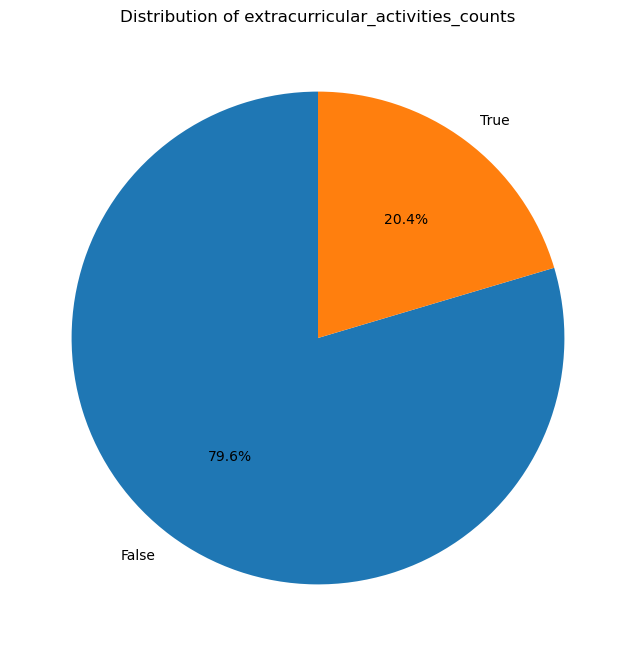

In [18]:
extracurricular_activities_counts = df['extracurricular_activities'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(extracurricular_activities_counts, labels=extracurricular_activities_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of extracurricular_activities_counts')
plt.show()

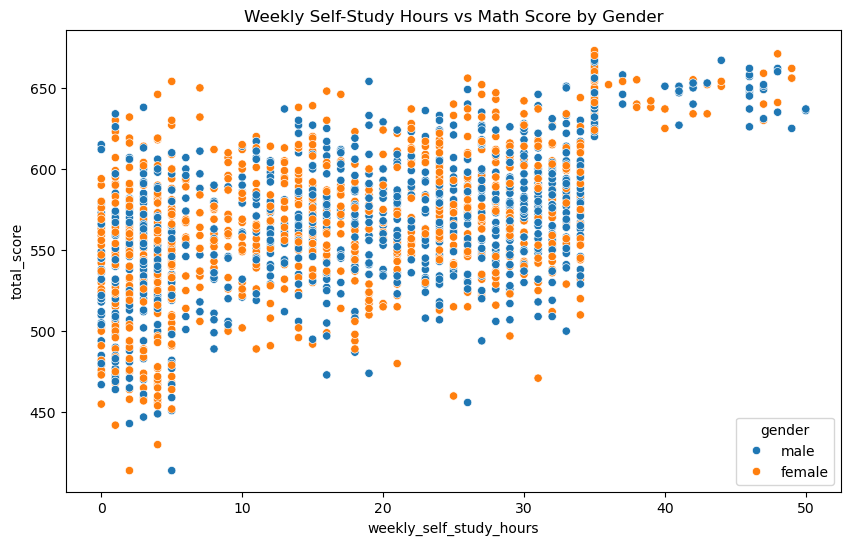

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weekly_self_study_hours', y='total_score', hue='gender')
plt.title('Weekly Self-Study Hours vs Math Score by Gender')
plt.show()

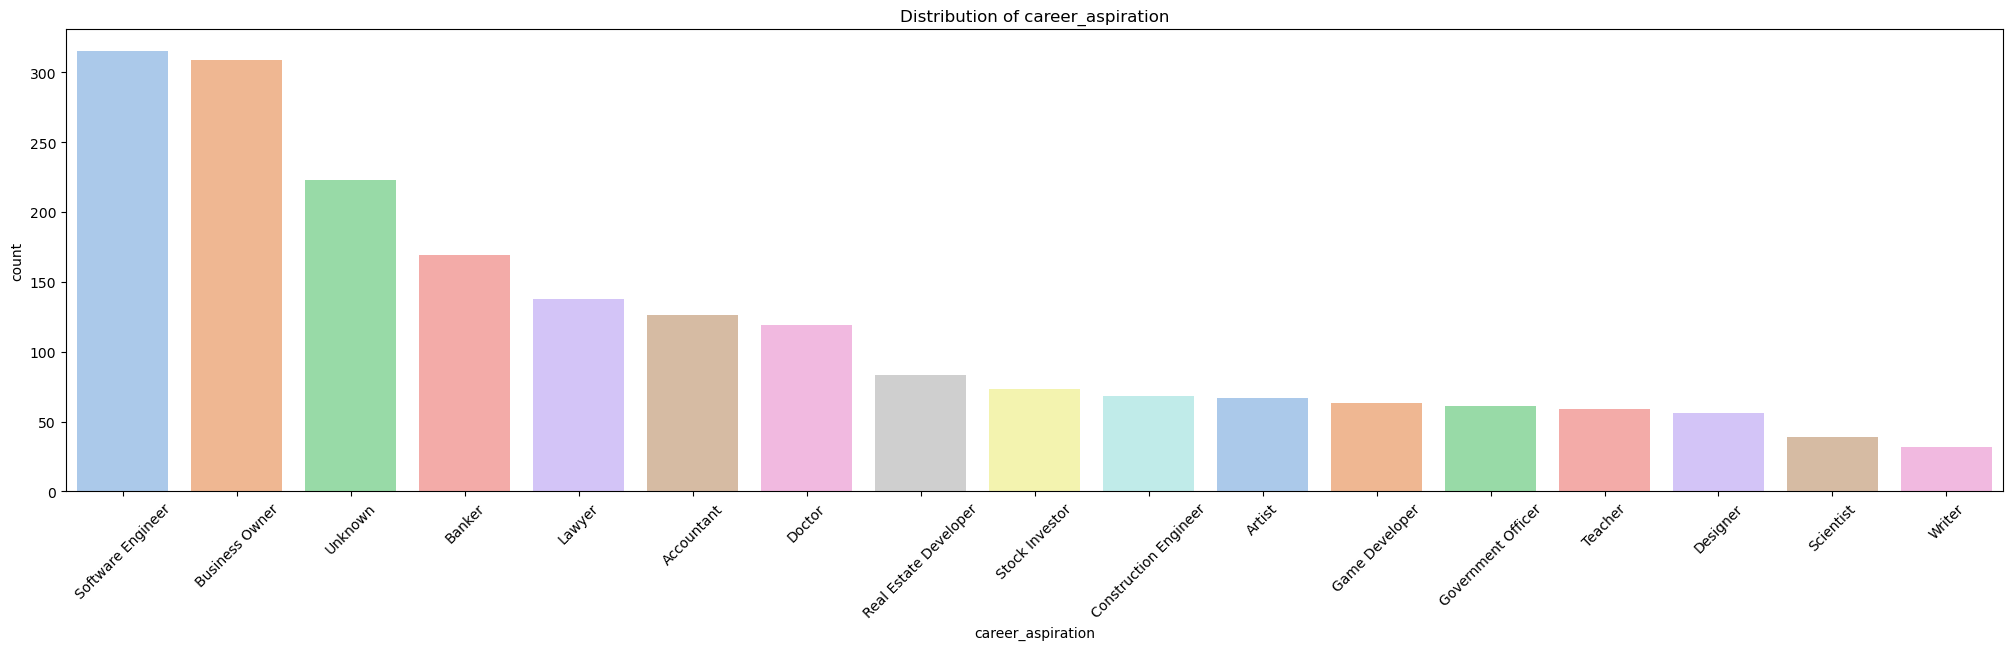

In [20]:
plt.figure(figsize = (25,6))
sns.countplot(x = df['career_aspiration'], data=df, palette="pastel", order = df['career_aspiration'].value_counts().index)

plt.title('Distribution of career_aspiration')
plt.xticks(rotation=45)
plt.show()

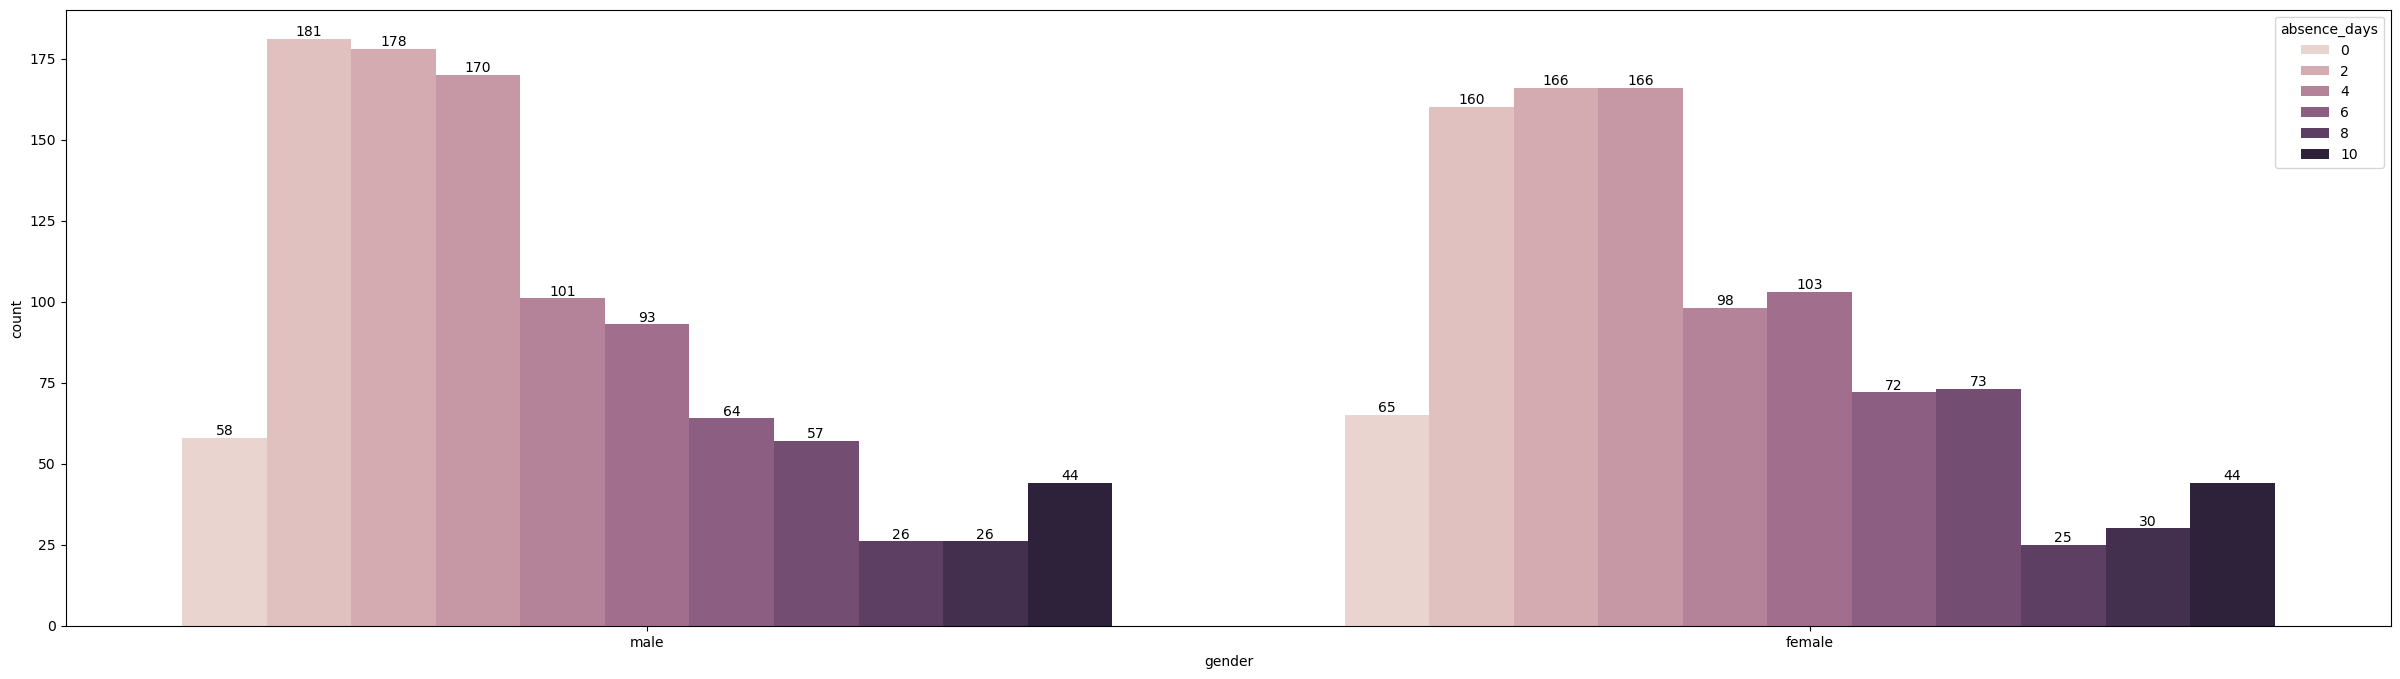

In [21]:
plt.figure(figsize=(30, 8))
ax = sns.countplot(data = df, x = 'gender', hue = 'absence_days')

for bars in ax.containers:
    ax.bar_label(bars)

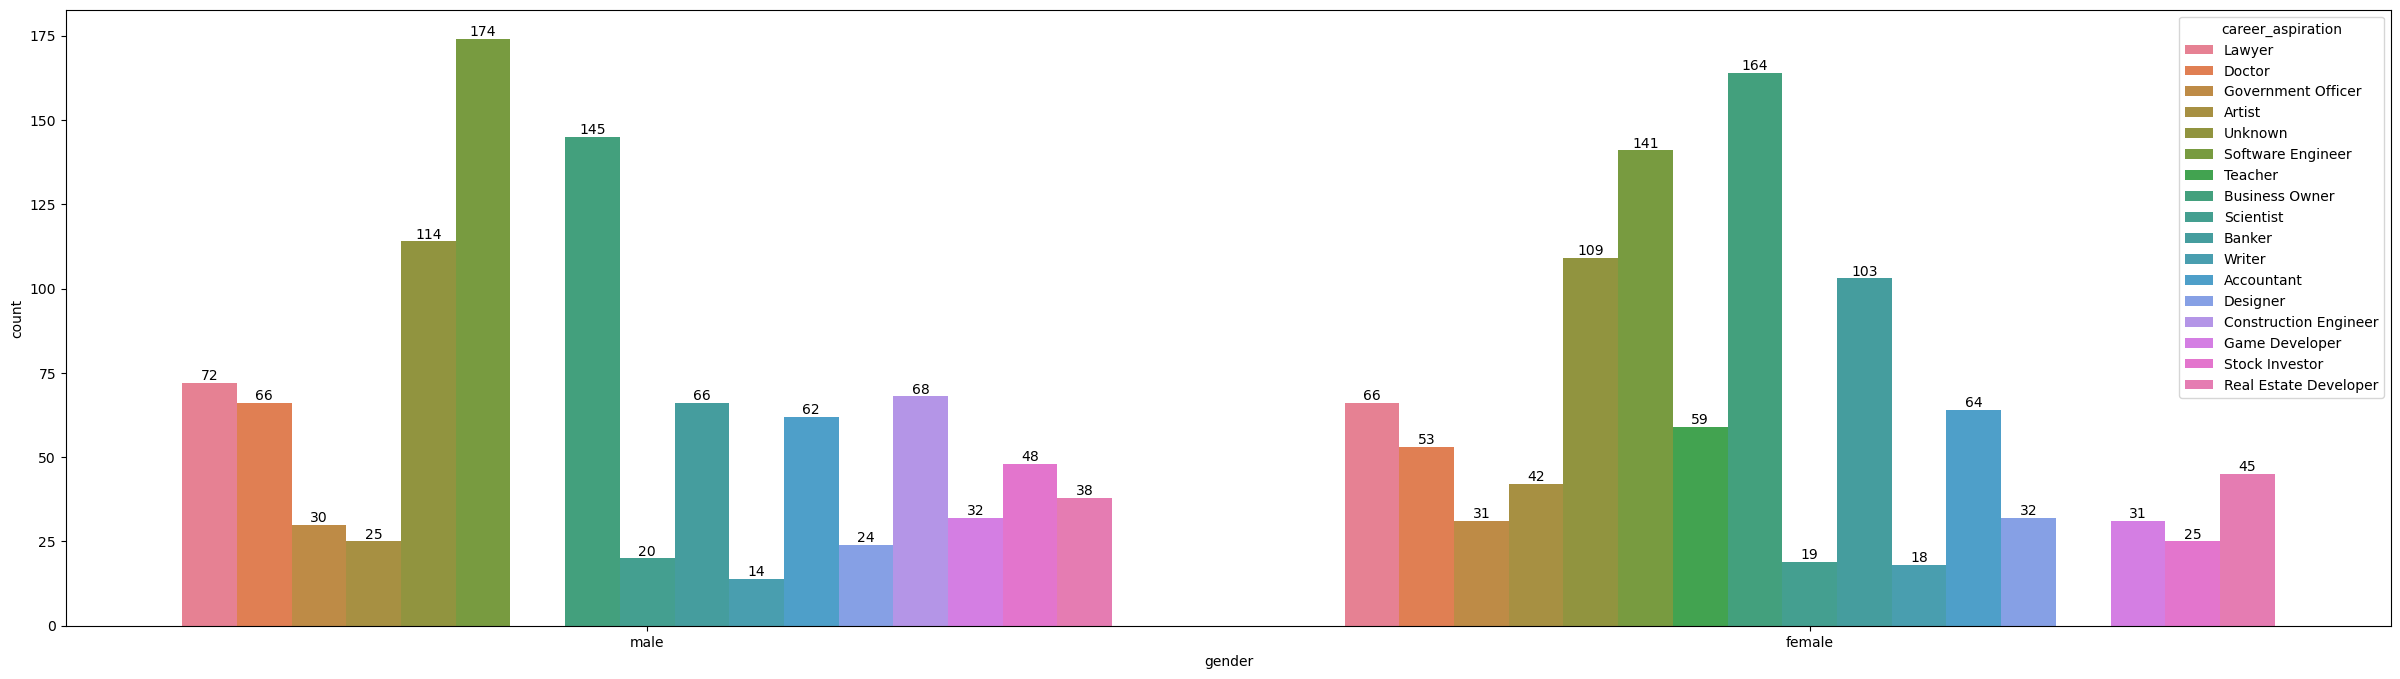

In [22]:
plt.figure(figsize=(30, 8))
ax = sns.countplot(data = df, x = 'gender', hue = 'career_aspiration')
           
for bars in ax.containers:
    ax.bar_label(bars)

<Figure size 1200x700 with 0 Axes>

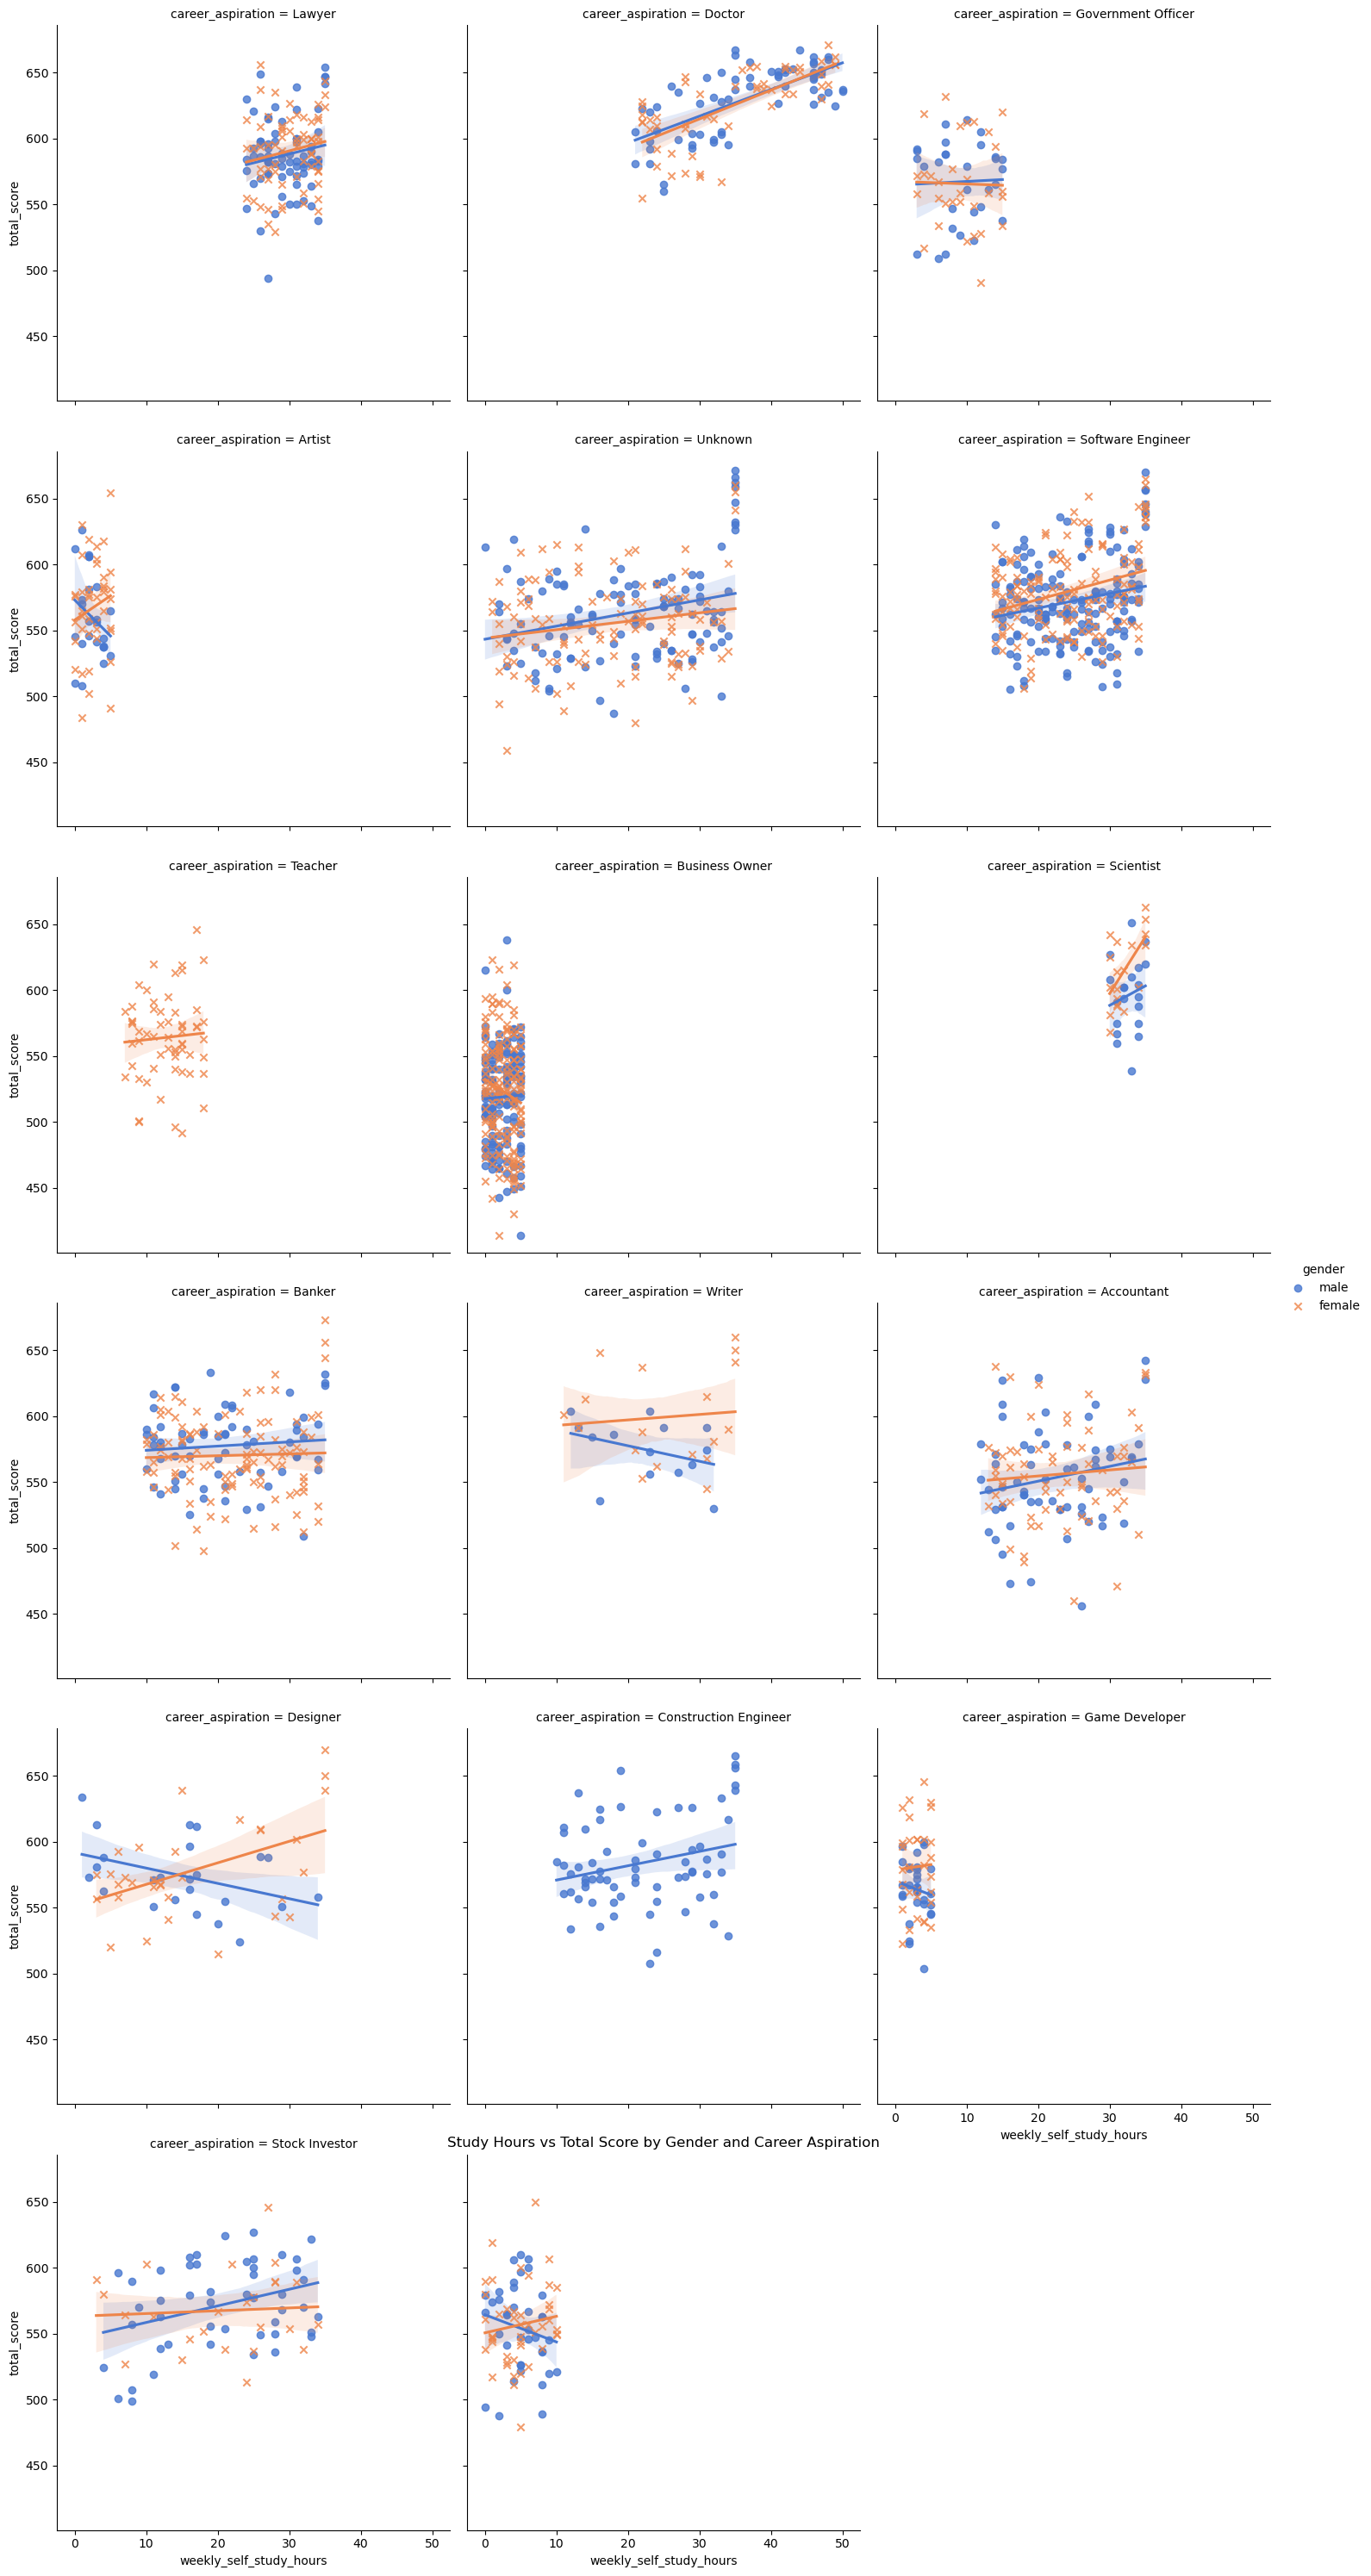

In [23]:
plt.figure(figsize=(12, 7))
sns.lmplot(data=df, x='weekly_self_study_hours', y='total_score', hue='gender', col='career_aspiration', markers=["o", "x"], palette='muted', col_wrap=3)
plt.title('Study Hours vs Total Score by Gender and Career Aspiration')
plt.show()

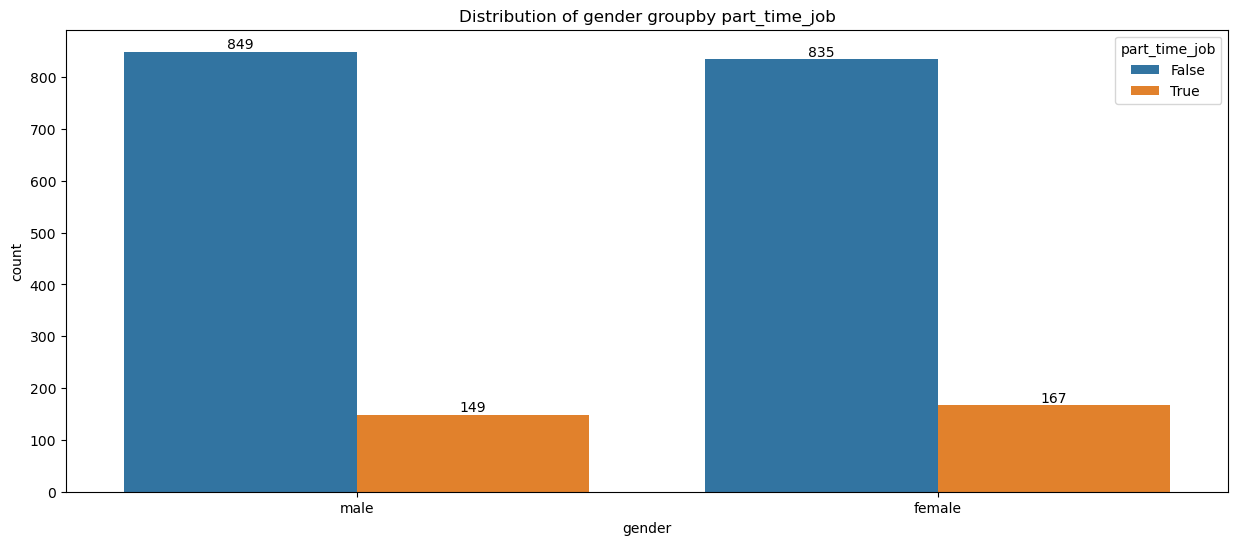

In [24]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data = df, x = 'gender', hue = 'part_time_job')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of gender groupby part_time_job')
plt.show()

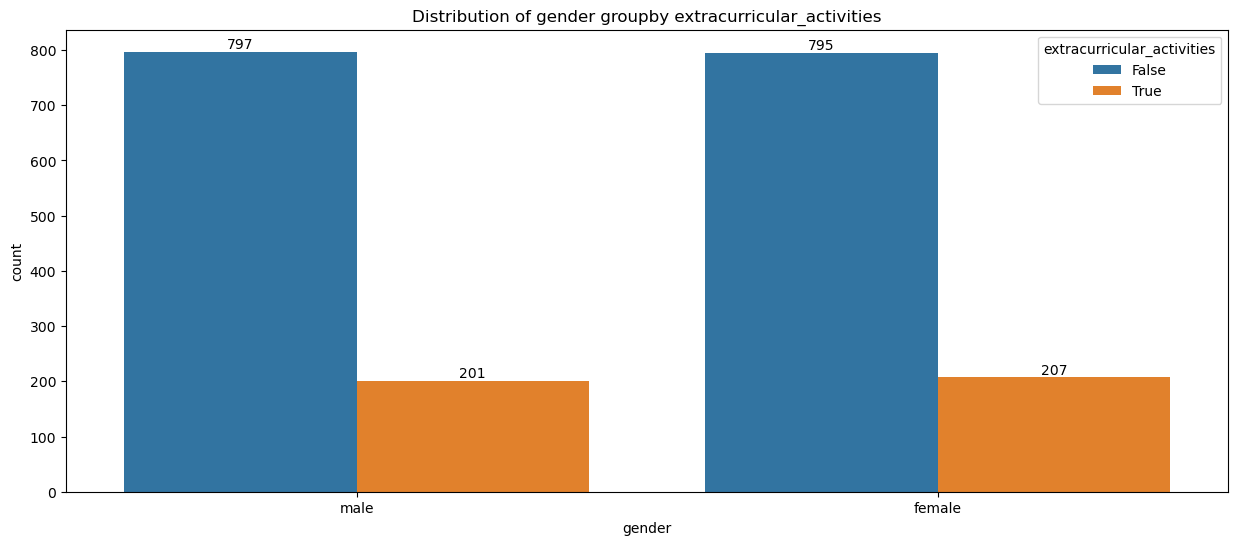

In [25]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data = df, x = 'gender', hue = 'extracurricular_activities')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of gender groupby extracurricular_activities')
plt.show()

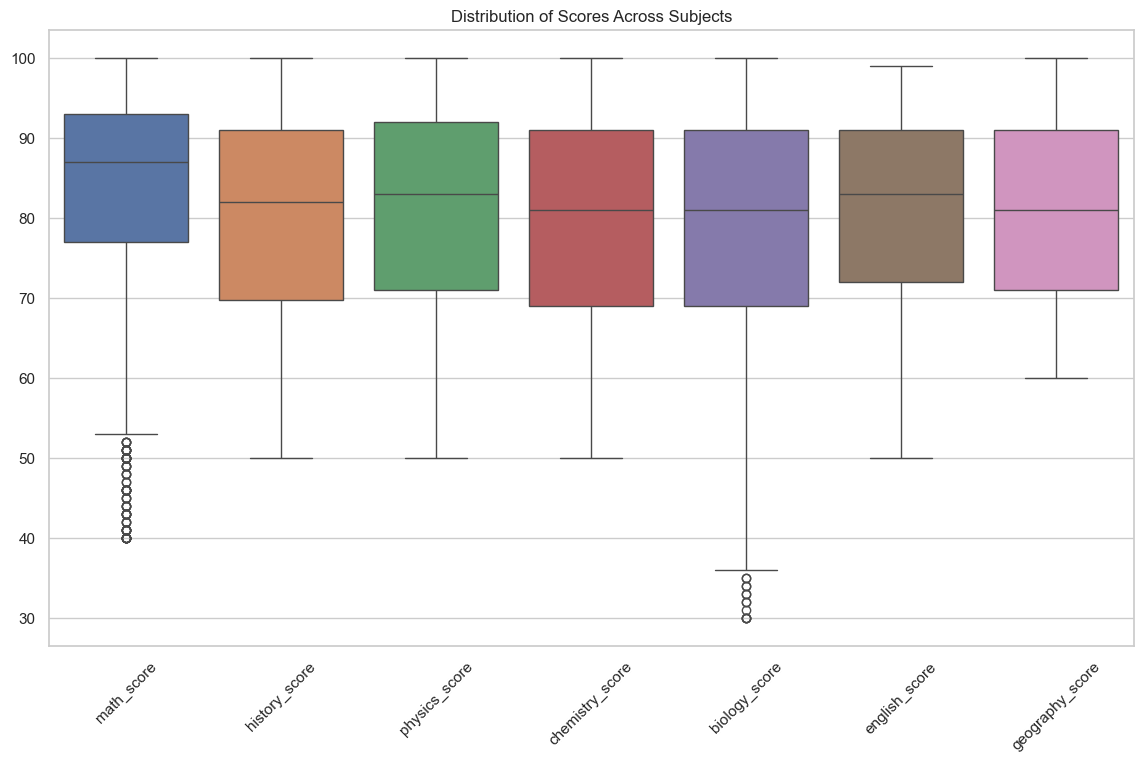

In [26]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']])
plt.title('Distribution of Scores Across Subjects')
plt.xticks(rotation=45)
plt.show()

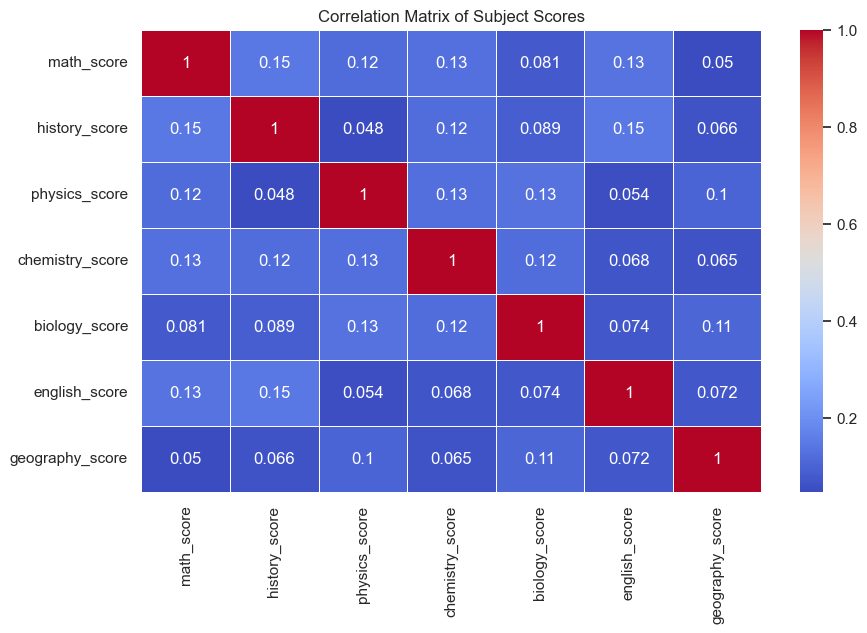

In [27]:
# Correlation matrix for scores
plt.figure(figsize=(10, 6))
correlation_matrix = df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Subject Scores')
plt.show()

In [28]:
df

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,1,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,558,79.714286
1996,1997,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,534,76.285714
1997,1998,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,578,82.571429
1998,1999,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,566,80.857143


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Normalize subject scores
scaler = MinMaxScaler()
subject_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
normalized_scores = scaler.fit_transform(df[subject_columns])

# Step 2: Compute cosine similarity between students based on subject scores
similarity_matrix = cosine_similarity(normalized_scores)

# Step 3: Define a function to recommend career aspirations
def recommend_career(student_id, num_recommendations=5):
    # Get the index of the student
    student_idx = df.index[df['id'] == student_id].tolist()[0]
    
    # Find the most similar students based on cosine similarity
    similarity_scores = list(enumerate(similarity_matrix[student_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]  # Exclude self
    
    # Get the career aspirations of the most similar students
    similar_students_idx = [idx for idx, _ in similarity_scores]
    recommended_careers = df.iloc[similar_students_idx]['career_aspiration'].value_counts().head(3)
    
    return recommended_careers

# Example: Recommend careers for a student with id=1
recommend_career(student_id=3)


career_aspiration
Stock Investor       1
Software Engineer    1
Doctor               1
Name: count, dtype: int64

In [30]:
percentiles = df[subject_columns].quantile([0.25, 0.75])

def recommend_subjects(student_id):
    student_scores = df[df['id'] == student_id][subject_columns].iloc[0]
    focus_subjects = student_scores[student_scores < percentiles.loc[0.25]].index.tolist()
    strength_subjects = student_scores[student_scores > percentiles.loc[0.75]].index.tolist()
    
    return {
        'focus_subjects': focus_subjects,
        'strength_subjects': strength_subjects
    }

recommend_subjects(student_id=1)


{'focus_subjects': ['math_score', 'biology_score'],
 'strength_subjects': ['physics_score', 'chemistry_score']}

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
X = df[subject_columns].values
y = label_encoder.fit_transform(df['career_aspiration'])

In [57]:
y = to_categorical(y)

In [59]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [61]:
y.shape

(2000, 17)

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Build the improved model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multiclass classification
])

In [67]:
# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs and a larger batch size
history = model.fit(X_scaled, y, epochs=600, batch_size=20, validation_split=0.2)

Epoch 1/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1281 - loss: 2.7120 - val_accuracy: 0.3175 - val_loss: 2.3330
Epoch 2/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2849 - loss: 2.3488 - val_accuracy: 0.3550 - val_loss: 2.2220
Epoch 3/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3023 - loss: 2.2378 - val_accuracy: 0.3425 - val_loss: 2.1815
Epoch 4/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3062 - loss: 2.2001 - val_accuracy: 0.3625 - val_loss: 2.1287
Epoch 5/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3215 - loss: 2.1289 - val_accuracy: 0.3475 - val_loss: 2.1512
Epoch 6/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 2.1379 - val_accuracy: 0.3325 - val_loss: 2.1295
Epoch 7/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3355 - loss: 2.1110 - val_accuracy: 0.3500 - val_loss: 2.1065
Epoch 8/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3437 - loss: 2.0220 - val_accuracy: 0.3475 - v

In [81]:
# Make predictions for a student after scaling their data
student_id = 10
student_scores = df[df['id'] == student_id][subject_columns].values
student_scores_scaled = scaler.transform(student_scores)

# Predict the career aspiration
predicted_career = model.predict(student_scores_scaled)
predicted_career_label = label_encoder.inverse_transform([predicted_career.argmax()])

print(f"Recommended career aspiration for student {student_id}: {predicted_career_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Recommended career aspiration for student 10: Teacher


In [77]:
df.head(10)

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,1,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571
5,6,female,False,2,False,26,Unknown,93,100,67,78,72,80,84,574,82.000000
6,7,male,False,3,True,23,Software Engineer,99,96,97,73,88,76,64,593,84.714286
7,8,male,True,2,True,34,Software Engineer,95,95,82,63,84,70,85,574,82.000000
8,9,male,False,6,False,25,Unknown,94,68,94,85,81,74,72,568,81.142857
9,10,female,False,3,True,18,Teacher,98,69,88,71,67,71,73,537,76.714286
